In [29]:
# edit or add markdown

In [30]:
#!wget https://raw.githubusercontent.com/futureomics/IRIS-Data-Machine-learning-Modelling/refs/heads/main/iris.csv

In [31]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [55]:
!pip install scikit-learn
from sklearn.datasets import load_iris  #importing the iris dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
print(df.columns)
y = df['species']

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


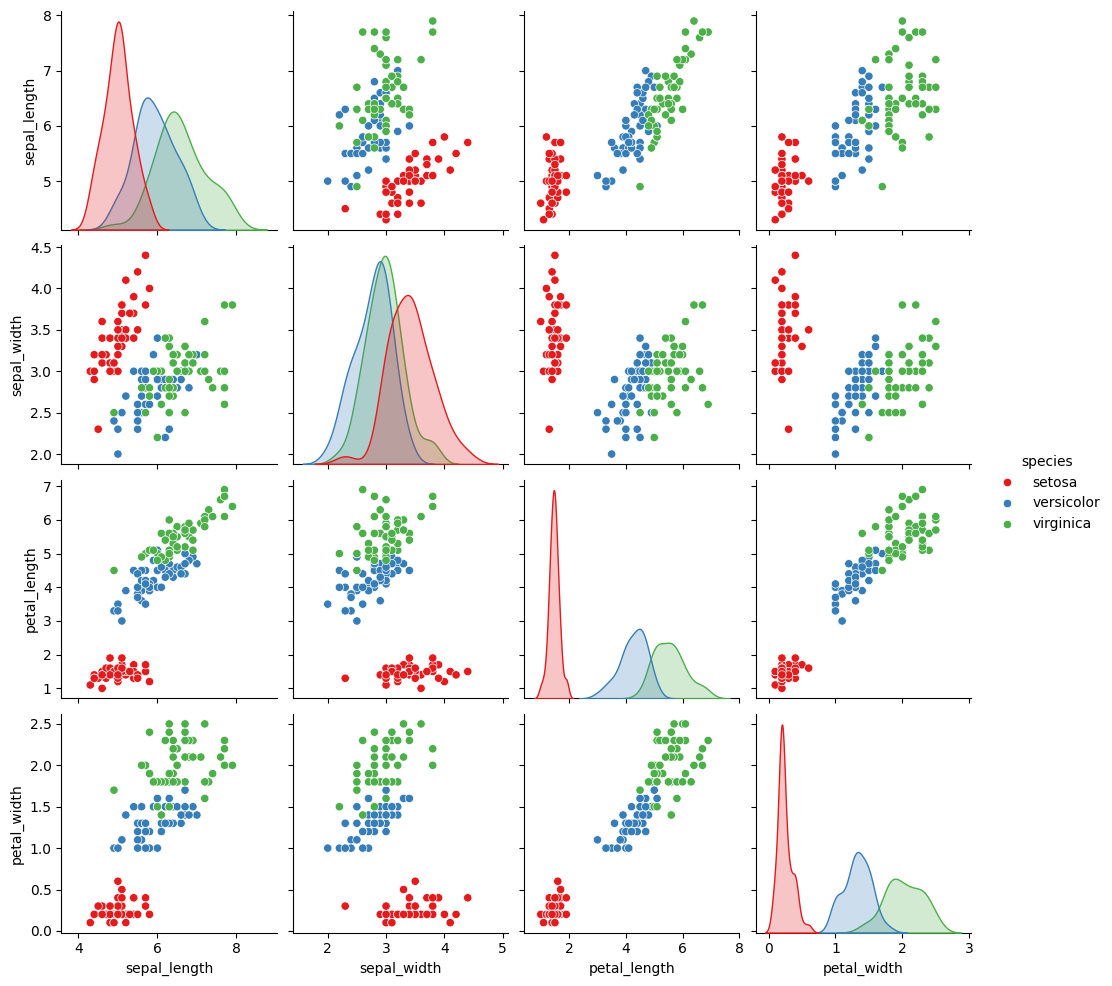

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64


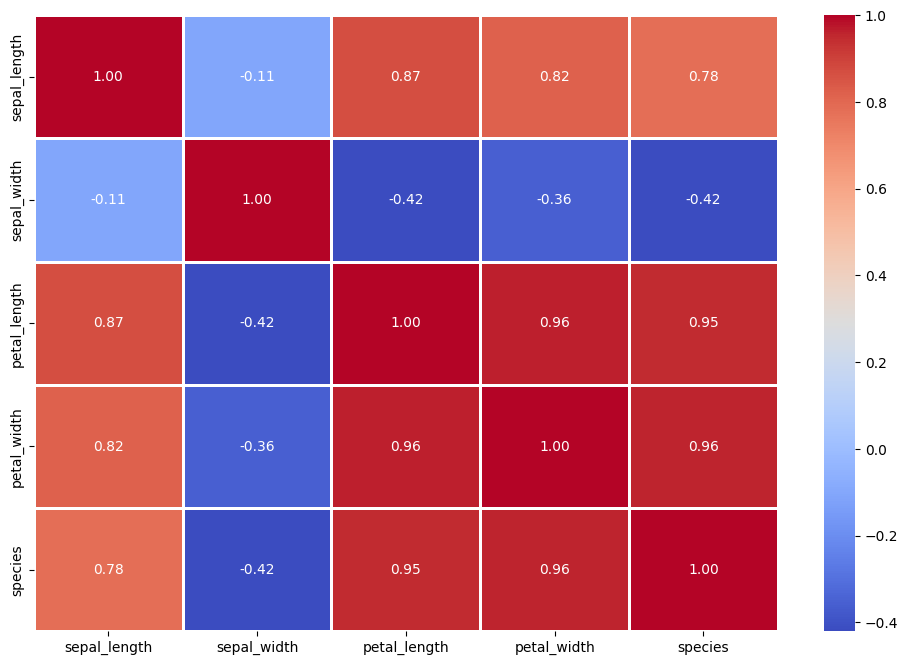

In [34]:
#Data visualization pairplot
sns.pairplot(df, hue='species', palette='Set1')
plt.show()

import matplotlib.pyplot as plt
#always encode non numeric values to numeric before comupting correlation
#This method assigns a unique integer to each category.
df['species'] = df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
print(df['species'].head())  # Check encoding


corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()

In [35]:
#Generating heatmap #generic code for heatmap
#import matplotlib.pyplot as plt
#load the csv file as a datafram (here it is already loaded)
#print(df.head())

# Define the target column and feature columns
#target_column = "your_target_column"
#feature_columns = ["feature1", "feature2", "feature3"]  # Select relevant features

# Create a subset with only the target and features
#df_subset = df[feature_columns + [target_column]]

In [36]:
# Compute the correlation matrix
#correlation_matrix = df_subset.corr()

In [37]:
# Set figure size
#plt.figure(figsize=(10, 8))

# Create the heatmap using seaborn
#sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
#plt.title("Feature-Target Correlation Heatmap")

# Show the plot#
#plt.show()

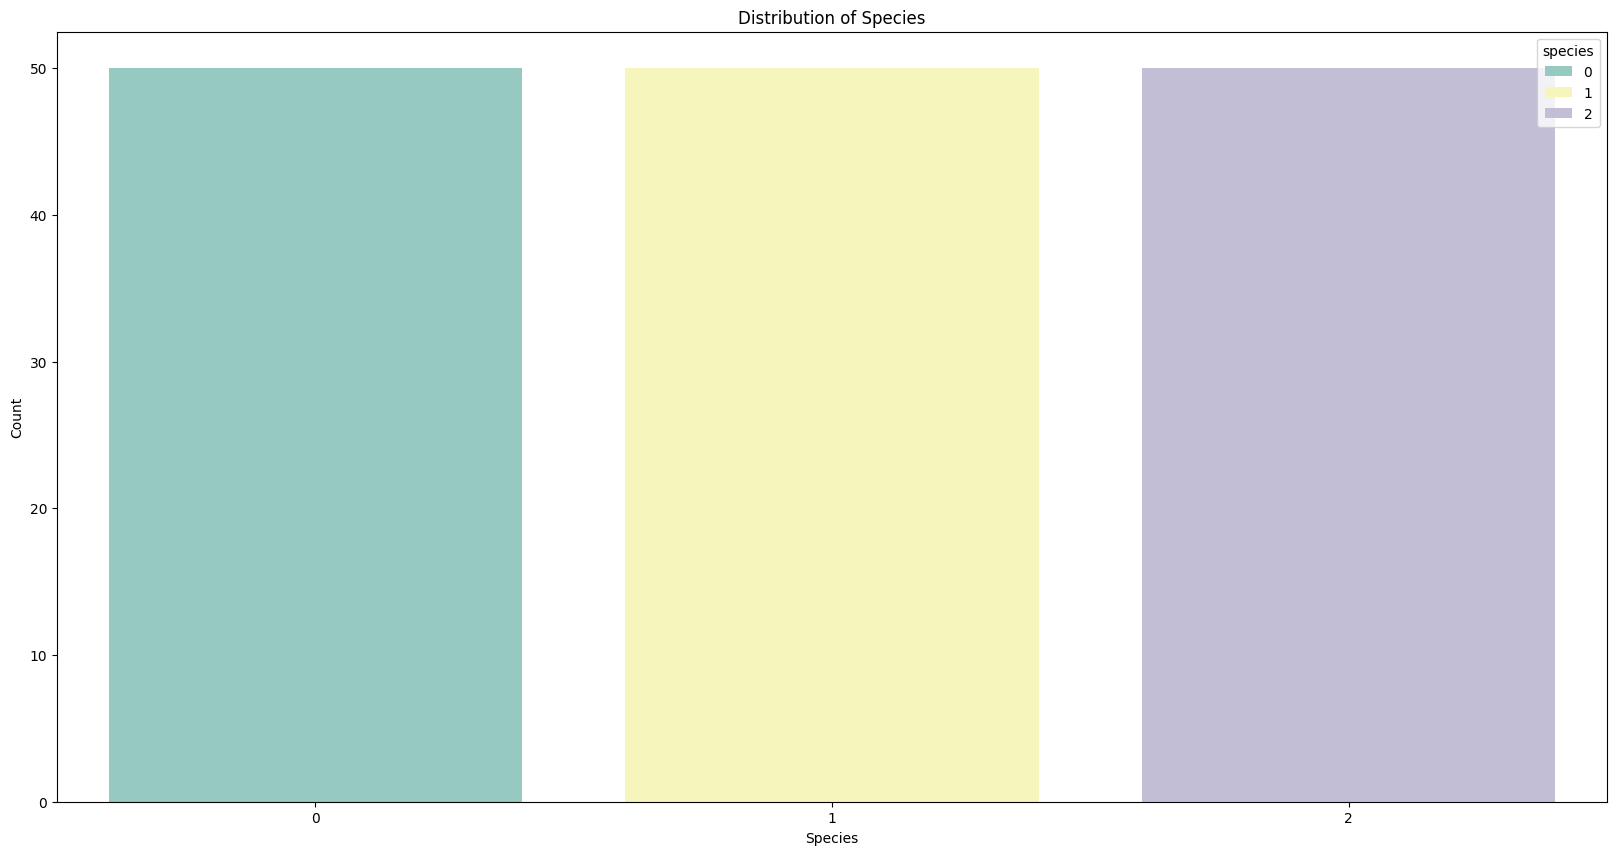

In [38]:
# Convert 'species' column to a categorical type
#df['species'] = df['species'].astype(str)  # Ensures species names are strings #but still returns 012 as x label
#Visualizing data distribution
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='species', hue='species', palette ='Set3')
plt.title('Distribution of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

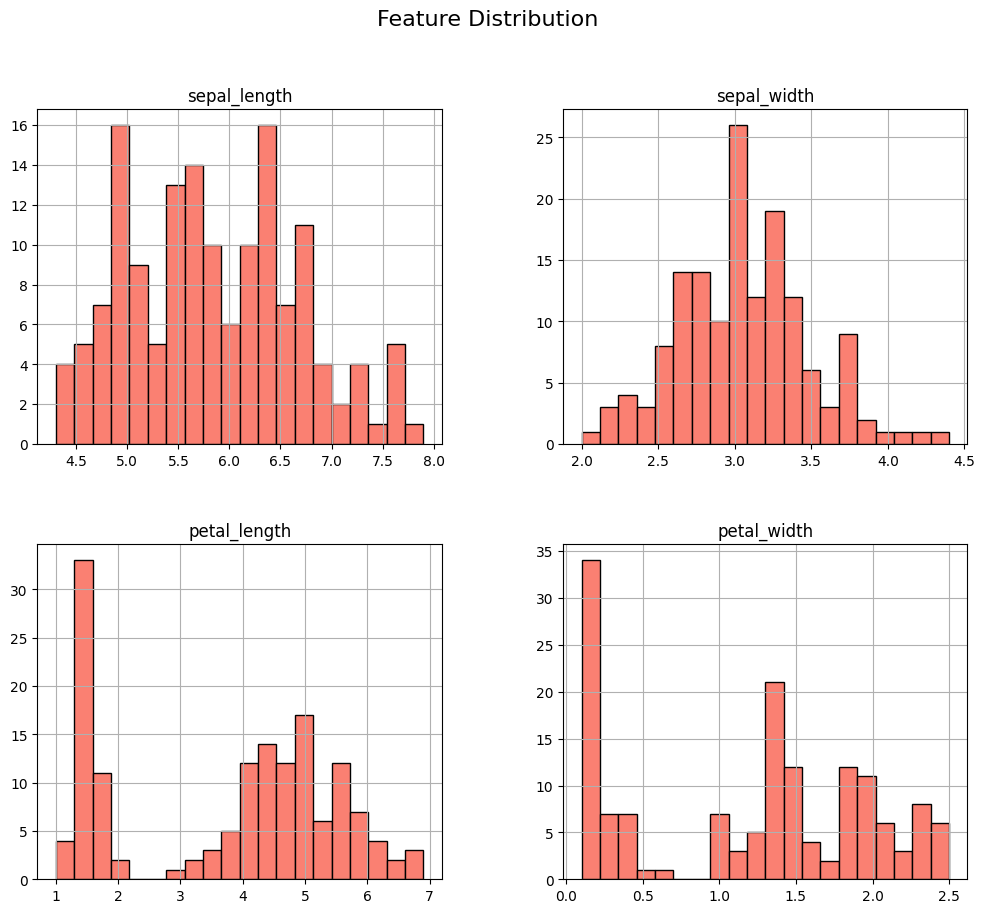

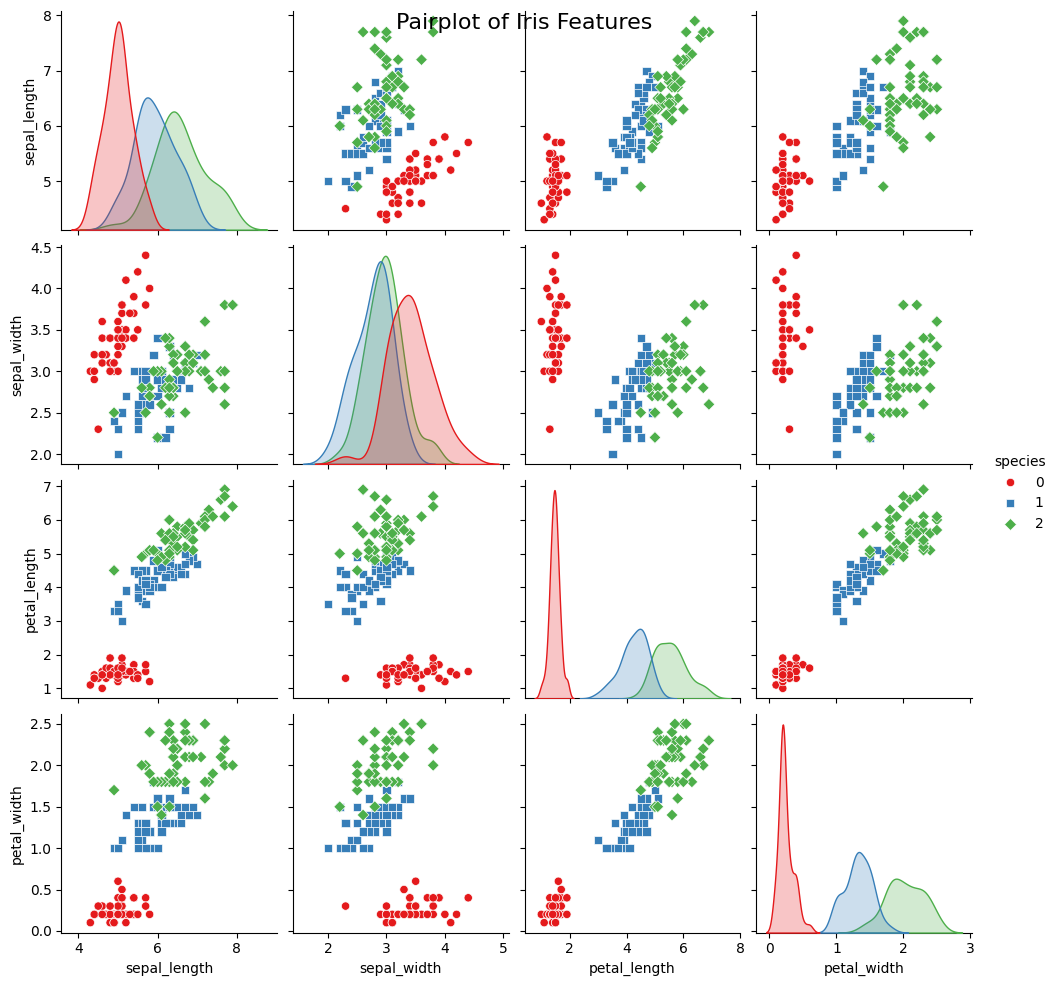

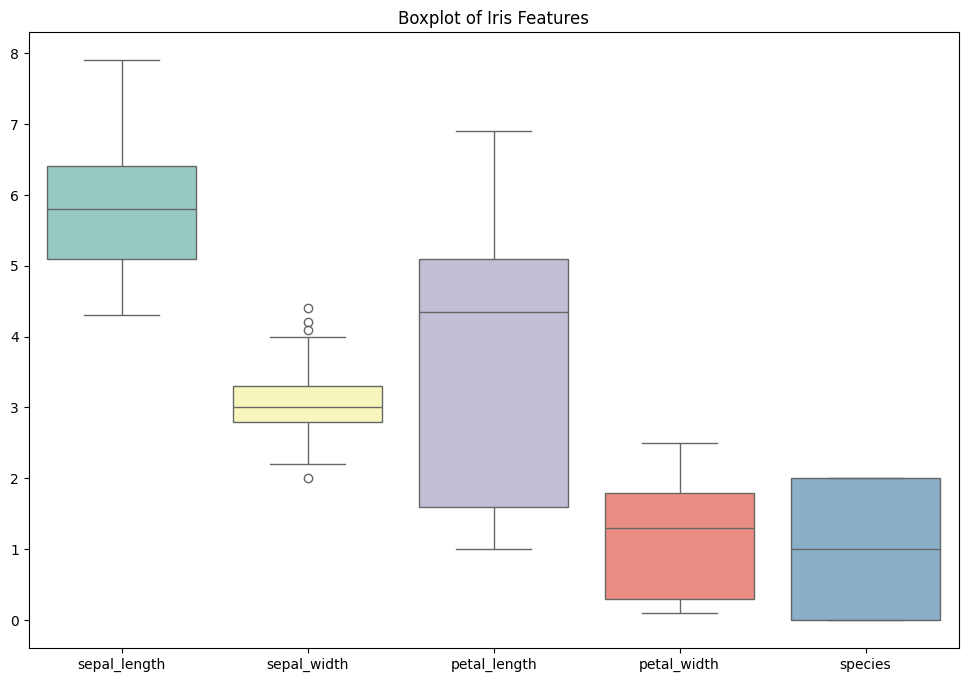

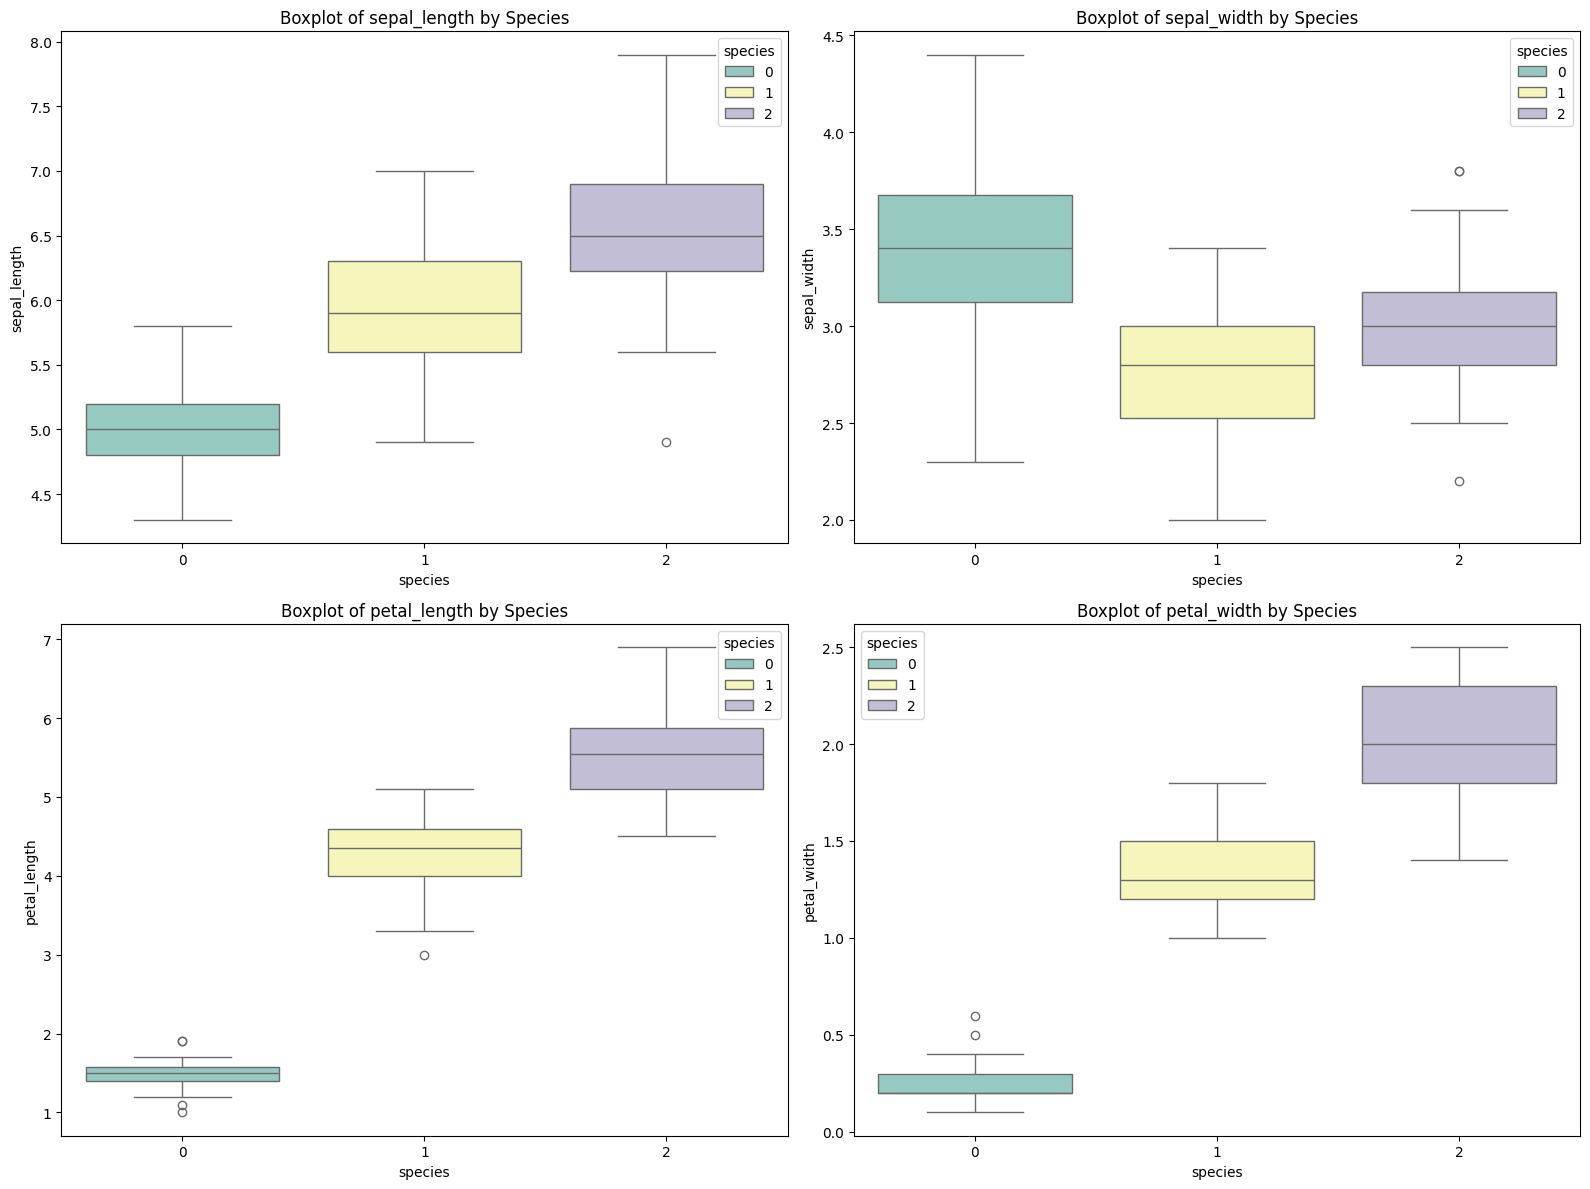

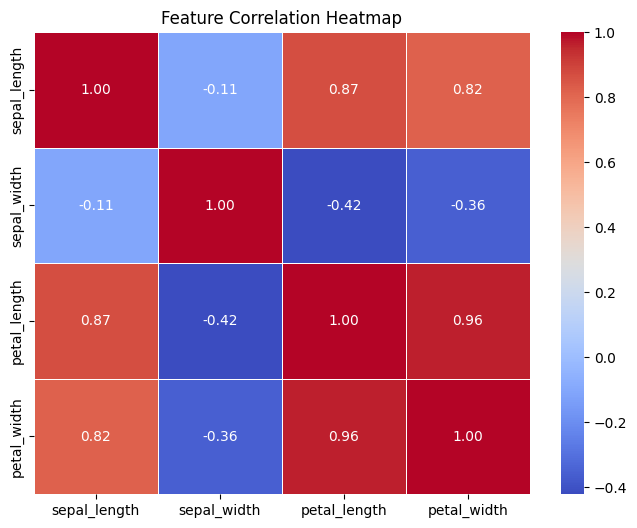

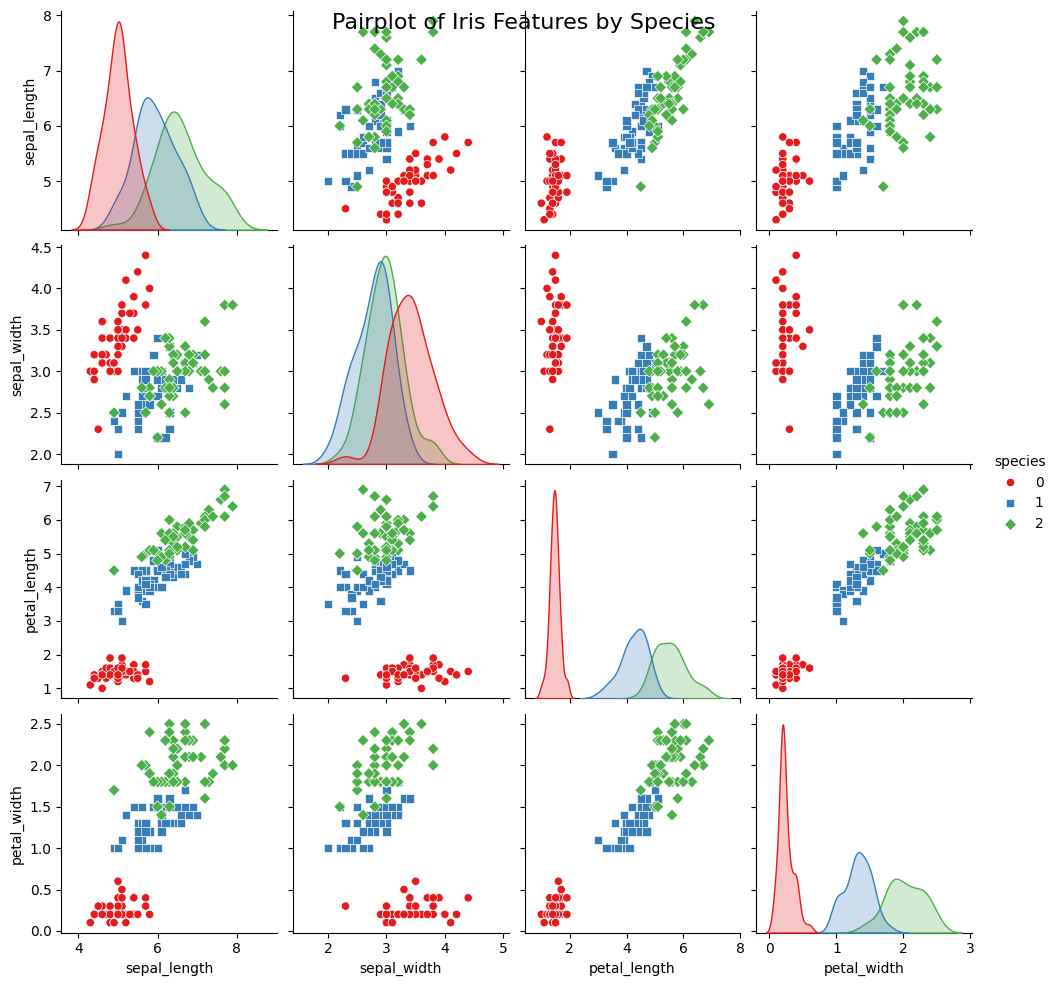

In [39]:
##FEATURE DISTRIBUTION

#histogram of features
df.iloc[:, :-1].hist(bins=20, figsize=(12,10), layout=(2,2), color='salmon', edgecolor='black')
plt.suptitle("Feature Distribution", fontsize=16)
plt.show()

#Pairplot of features
sns.pairplot(df, hue='species', palette='Set1', diag_kind='kde', markers=["o", "s", "D"])
plt.suptitle('Pairplot of Iris Features', fontsize=16)
plt.show()

#Boxplot of the dataset in general -  (not needed0)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, palette='Set3')
plt.title('Boxplot of Iris Features')
plt.show()

#Box plot of the feature distribution for each species
# List of numerical features in the dataset
plt.figure(figsize=(16, 12))
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Loop through each feature and create a subplot
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)  # Creating a 2x2 grid of subplots
    sns.boxplot(data=df, x='species', y=feature, hue='species', palette='Set3')
    plt.title(f'Boxplot of {feature} by Species')

plt.tight_layout()  # Adjust layout for better readability
plt.show()

#heatmap of the features
#  Must generate correlation matric before heatmap
df_features = df.drop(columns=['species'])
# Compute the correlation matrix
corr_matrix = df_features.corr()
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#Pairplot of features wrt target
sns.pairplot(df, hue='species', palette='Set1', markers=["o", "s", "D"])
plt.suptitle('Pairplot of Iris Features by Species', fontsize=16)
plt.show()

### we can thus make n number of plots for data visualization for overall dataframe or drop the target column and explore the features

# START  OF ML MODELLING

###  As we have different classes of data (labels / supervised data) we are looking to build a classifier model
###  Check the dataset structure

In [40]:
# check the dataset structure
print(df.head())
print(df_features.head())
print(y.head())
x = df_features
print(x.head())

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7  

In [41]:
# Separate features and target
#X = df.drop(columns=['species'])  # Features
#y = df['species']  # Target variable

#### Explanation of the code below:
###### X, y → Input and Output Data
###### X: Feature matrix (independent variables)
###### Contains all input features (e.g., petal length, petal width, etc.)
###### y: Target variable (dependent variable)
###### Contains class labels (e.g., species in the Iris dataset)
######  test_size=0.2 → Splitting Ratio
###### 0.2 means 20% of the data is allocated for the test set, and the remaining 80% is used for training.
###### Example: If we have 150 samples, 120 will be in X_train, and 30 in X_test.
###### stratify=y → Maintains Class Distribution
###### Ensures that the proportion of classes (species) remains the same in both train and test sets.
###### Example: If y contains 50% class A, 30% class B, and 20% class C, stratification ensures these proportions are maintained in both training and test sets.
###### This prevents imbalanced data issues in classification problems.
###### Example Without stratify=y
###### If you don’t use stratify=y, the split might result in an imbalanced test set, meaning some classes may have very few or no examples, leading to biased model performance.

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
# Standardize the features (optional but recommended for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Get the feature importance
###### If you're using a tree based model like Random Forest, Decision Trees, or XGBoost, you can get feature importance directly from the trained model.
###### For linear models like Logistic Regression, Linear Regression, and SVM, feature importance is determined by the absolute values of the coefficients.
###### So we generate a classifier model fires (random forest model) to easily identify important feature

###### Here we can choose the number of trees generated by the option n_estimators, 100 means that the model will create 100 trees more trees generally increases oerformance but increases computation time. you can completely drop this option.

###### 3️⃣ random_state=42
###### Ensures reproducibility by setting a fixed seed for randomness.
###### Any number can be used instead of 42, but using the same value ensures that every time you run the code, you get the same results.
        - Example Without random_state:
###### Each time the model is trained, it might generate slightly different results.
        - Example With random_state=42:
###### The results remain the same across different runs.

###### model.fit(X_train, y_train) trains your random forest model (model) using the training data (X_train) and their corresponding labels (y_train). This helps the model learn patterns from the training data to make predictions on new, unseen data in the future.

##### y_pred = model.predict(X_test)

<p style="font-size:10px;"> The line y_pred = model.predict(X_test) uses the trained model to predict the labels for the test data X_test. This prediction is stored in y_pred.
 Labels are the target or output variables that the model is trying to predict. In the Iris dataset:
  - Features: These are the sepal length, sepal width, petal length, and petal width of the iris flowers.
  - Labels: These are the species of the iris flowers, which can be Setosa, Versicolor, or Virginica. </p>

  ##### Confusion Matrix
  <p style="font-size:10px;"> A Confusion Matrix is a performance measurement tool used in machine learning, particularly for classification tasks. It provides a summary of prediction results on a classification problem and helps you understand the performance of your model.

<p style="font-size:10px;"> Here's why it's used:
Visualization of Performance: It visually shows the number of correct and incorrect predictions made by the model compared to the actual outcomes (labels).
Detailed Insight: It provides detailed insights into not just overall accuracy, but also the types of errors made by the classifier.
Components:
- True Positive (TP): The model correctly predicted the positive class.
- True Negative (TN): The model correctly predicted the negative class.
- False Positive (FP): The model incorrectly predicted the positive class.
- False Negative (FN): The model incorrectly predicted the negative class.
Metrics Derived:
- Accuracy: (TP + TN) / Total
- Precision: TP / (TP + FP)
- Recall: TP / (TP + FN)
- F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
In your code example, the confusion matrix is visualized using a heatmap, which makes it easy to see how many correct and incorrect predictions were made for each class in your Iris dataset. This is crucial for understanding and improving your model's performance. </p>

Model Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



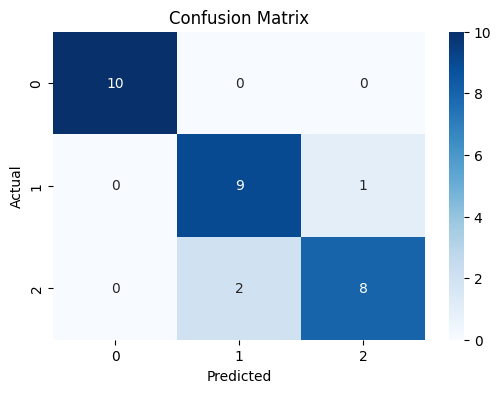

In [43]:
# Train a random forest model to compute feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf_model.fit(X_train, y_train) 
# Evaluate the Model
y_pred = rf_model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=df['species'].unique(), yticklabels=df['species'].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## 🏆 Model Performance Summary

Your **Random Forest Classifier** achieved **90% accuracy**, which is quite good for the **Iris dataset**! Here's an interpretation of the results:

### 🔹 Breakdown of the Classification Report

| Class        | Precision | Recall | F1-Score | Support |
|-------------|-----------|--------|---------|---------|
| **Setosa**      | 1.00     | 1.00   | 1.00    | 10 |
| **Versicolor**  | 0.82     | 0.90   | 0.86    | 10 |
| **Virginica**   | 0.89     | 0.80   | 0.84    | 10 |

### 🔹 Interpretation
- **Setosa (1.00 precision, 1.00 recall):** Perfect classification! No misclassification occurred.
- **Versicolor (0.82 precision, 0.90 recall):** Some Versicolor samples were misclassified as Virginica.
- **Virginica (0.89 precision, 0.80 recall):** Some Virginica samples were misclassified as Versicolor.

### 🔹 Accuracy
- **90% accuracy** means **27 out of 30** test samples were classified correctly.

### 🔹 Macro & Weighted Averages
- **Macro Avg:** Average across all classes (equal weight).
- **Weighted Avg:** Weighted by the number of instances in each class.

## 📌 Understanding the Metrics
**Precision** = TP / (TP + FP)  
→ Of all instances predicted as a class, how many were actually that class?  

**Recall** = TP / (TP + FN)  
→ Of all actual instances of a class, how many were correctly predicted?  

**F1-Score** = Harmonic mean of Precision and Recall  
→ A balance between precision and recall.  

---

## 🔹 Interpreting Each Class

### 1️⃣ Setosa (Precision: 1.00, Recall: 1.00)
- **Precision = 1.00** → Every instance predicted as "Setosa" was actually Setosa.
- **Recall = 1.00** → Every actual Setosa instance was correctly classified.
- **Conclusion**: ✅ **Perfect classification** (no misclassification).

### 2️⃣ Versicolor (Precision: 0.82, Recall: 0.90)
- **Recall = 0.90** → 90% of actual Versicolor instances were correctly classified.
- **Precision = 0.82** → 82% of the predicted Versicolor instances were correct.
- **Inference**: Some Versicolor samples were misclassified (likely as **Virginica** since that’s the most similar class).

### 3️⃣ Virginica (Precision: 0.89, Recall: 0.80)
- **Recall = 0.80** → Only 80% of actual Virginica instances were correctly classified.
- **Precision = 0.89** → 89% of predicted Virginica instances were correct.
- **Inference**: Some actual Virginica samples were misclassified, likely as **Versicolor**.

---

## 🔍 How Do We Know Versicolor & Virginica Were Confused?
If a class had **low recall**, it means some of its instances were misclassified. Since **Versicolor and Virginica** are often confused due to their overlapping features (like petal width & length), it's likely that:
- **Some Versicolor samples were classified as Virginica.**
- **Some Virginica samples were classified as Versicolor.**

In [44]:
# X_train is a NumPy array, not a Pandas DataFrame, so it doesn’t have a .columns attribute. 
print(type(X_train))
X_train = pd.DataFrame(X_train, columns=df.drop('species', axis=1).columns) #This will ensure it retains the feature names.
print(X_train.columns)
print(X_train.head())

<class 'numpy.ndarray'>
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
   sepal_length  sepal_width  petal_length  petal_width
0     -1.721568    -0.324840     -1.347036    -1.320168
1     -1.124492    -1.226129      0.414290     0.651867
2      1.144395    -0.550162      0.584741     0.257460
3     -1.124492     0.125805     -1.290219    -1.451638
4     -0.408002    -1.226129      0.130206     0.125991


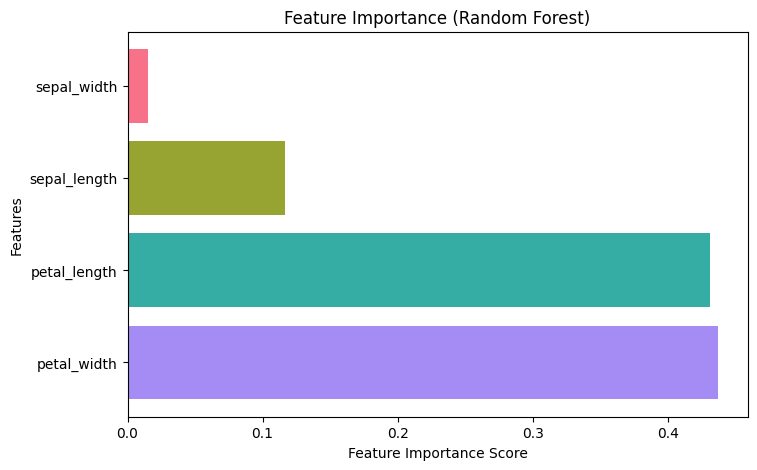

In [45]:
# Get feature importance from the trained model
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot feature importance
# Define a color palette (you can also use a colormap)
colors = sns.color_palette("husl", len(feature_importance_df))

# Plot feature importance with different colors
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()



In [46]:
#PCA
# Convert back to DataFrame after train_test_split
X_train = pd.DataFrame(X_train, columns=df.columns[:-1])  # Adjust column names
X_test = pd.DataFrame(X_test, columns=df.columns[:-1])

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on train set
X_test_scaled = scaler.transform(X_test)  # Transform test set

# Perform PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print explained variance
print("Explained Variance by Components:", pca.explained_variance_ratio_)


Explained Variance by Components: [0.72454871 0.23273095]


## Next Steps:

### 1. Visualize PCA Components:
- Plot the first two principal components to check separability.

## Generate a scatter plot of PCA components

## Expected Outcome:
- This scatter plot will help us understand how well PCA has captured the variance in the dataset.
- If the classes are well separated, PCA has effectively reduced dimensionality while retaining critical information.

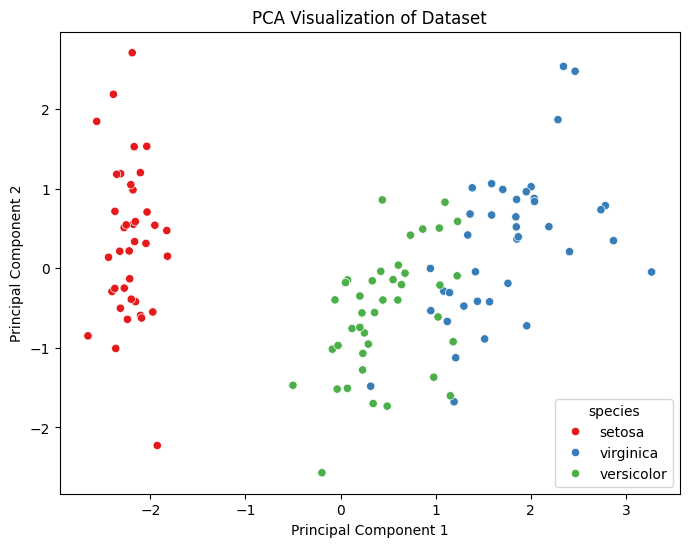

In [47]:
# 1. Visualize PCA Components:
# Convert PCA output to DataFrame for visualization
pca_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
pca_df['species'] = y_train.values  # Add labels for visualization

# Scatter plot of PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species', palette='Set1')
plt.title("PCA Visualization of Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


## Train models on PCA-transformed data:
Your existing classifiers (Logistic Regression, SVM, Random Forest) should now be tested on X_train_pca and X_test_pca.

Random Forest Accuracy after PCA: 0.93

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



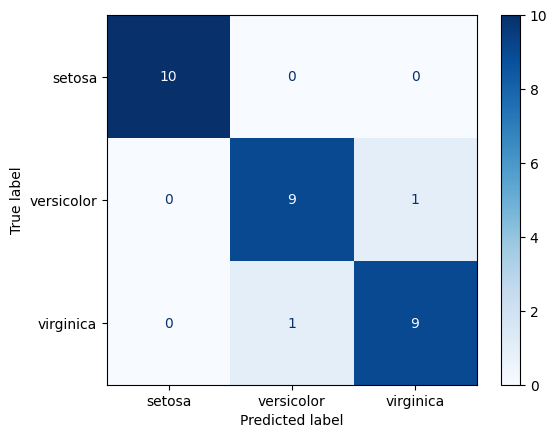

In [48]:
# Train Random Forest on PCA-transformed data
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_train_pca, y_train)

# Predict & Evaluate
y_pred_pca = rf_pca.predict(X_test_pca)
print(f"Random Forest Accuracy after PCA: {accuracy_score(y_test, y_pred_pca):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca))
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_pca)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_pca.classes_)
disp.plot(cmap="Blues", values_format="d")


##Train & Evaluate Models on PCA Data

In [49]:
# Train Random Forest on PCA-transformed data
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_train_pca, y_train)

# Predict & Evaluate
y_pred_pca = rf_pca.predict(X_test_pca)
print(f"Random Forest Accuracy after PCA: {accuracy_score(y_test, y_pred_pca):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca))


Random Forest Accuracy after PCA: 0.93

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## Use Logistic Regression to check the accuracy
### What to Expect
Accuracy of Logistic Regression after PCA transformation.
Decision boundary plot visualizing how Logistic Regression separates the classes in the PCA space.

In your previous steps, you performed PCA transformation on X_train_scaled and X_test_scaled like this:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

However, you did not define a variable called X_pca.

✅ Solution: Concatenate X_train_pca and X_test_pca
Before using train_test_split, do this:


Logistic Regression Accuracy after PCA: 0.53

Classification Report:
              precision    recall  f1-score   support

      setosa       0.47      0.80      0.59        10
  versicolor       0.67      0.67      0.67         9
   virginica       0.50      0.18      0.27        11

    accuracy                           0.53        30
   macro avg       0.55      0.55      0.51        30
weighted avg       0.54      0.53      0.50        30



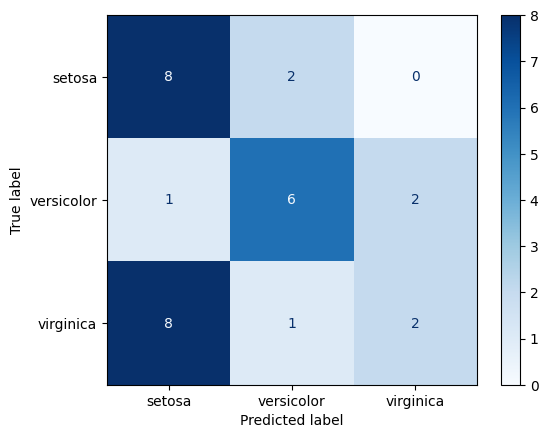

In [56]:
# Train Logistic Regression on PCA-transformed data
log_reg_pca = LogisticRegression(solver='lbfgs', random_state=42)
log_reg_pca.fit(X_train_pca, y_train)

# Predict on test data
y_pred_pca = log_reg_pca.predict(X_test_pca)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_pca)
print(f"Logistic Regression Accuracy after PCA: {accuracy:.2f}")

# Display Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca))

# Generate and Display the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_pca)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg_pca.classes_)
disp.plot(cmap="Blues", values_format="d")

### performin logistic regression before applying PCA

Logistic Regression Accuracy before PCA: 0.30

Classification Report:
              precision    recall  f1-score   support

      setosa       0.31      0.40      0.35        10
  versicolor       0.20      0.22      0.21         9
   virginica       0.43      0.27      0.33        11

    accuracy                           0.30        30
   macro avg       0.31      0.30      0.30        30
weighted avg       0.32      0.30      0.30        30



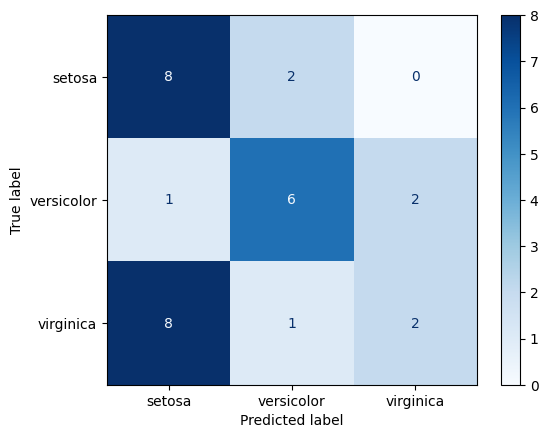

In [63]:

# Standardize Data Before Logistic Regression
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled1 = scaler.transform(X_test)        # Transform test data

# Train Logistic Regression on PCA-transformed data
log_reg_pca1 = LogisticRegression(solver='lbfgs', random_state=42)
log_reg_pca1.fit(X_train_scaled1, y_train)

# Predict on test data
y_pred_pca1 = log_reg_pca1.predict(X_test_scaled1)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_pca1)
print(f"Logistic Regression Accuracy before PCA: {accuracy:.2f}")

# Display Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca1))

# Generate and Display the Confusion Matrix
cm1 = confusion_matrix(y_test, y_pred_pca1)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=log_reg_pca1.classes_)
disp.plot(cmap="Blues", values_format="d")

In [ ]:

# Use Logistic Regression to check the accuracy

# Use SVM to check the accuracy

# Use Decision Tree to check the accuracy

# Use Random Forest to check the accuracy

# Use KNN to check the accuracy



In [ ]:
# Compare the performance of the models